In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pylab as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [3]:
! pip install -q kaggle
from google.colab import files 
files.upload() #upload kaggle.json.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pedrozeola","key":"7a3378e177ad4bdc2bc66a11d6ca4deb"}'}

In [4]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d theforcecoder/wind-power-forecasting
!unzip wind-power-forecasting.zip

import os
os.remove('wind-power-forecasting.zip')  

 67% 5.00M/7.51M [00:00<00:00, 38.9MB/s]
100% 7.51M/7.51M [00:00<00:00, 47.7MB/s]
Archive:  wind-power-forecasting.zip
  inflating: Turbine_Data.csv        


In [29]:
import pandas as pd

df = pd.read_csv('Turbine_Data.csv', parse_dates = True, header = 0)
df['Time'] = pd.to_datetime(df['Unnamed: 0'], yearfirst = True)

In [30]:
#Show the first 148 rows 
df.head(148)

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed,Time
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:00:00+00:00
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:10:00+00:00
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:20:00+00:00
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:30:00+00:00
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:40:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2017-12-31 23:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 23:50:00+00:00
144,2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088,2018-01-01 00:00:00+00:00
145,2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343,2018-01-01 00:10:00+00:00
146,2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610,2018-01-01 00:20:00+00:00


In [7]:
df.tail()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed,Time
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445,2020-03-30 23:10:00+00:00
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231,2020-03-30 23:20:00+00:00
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839,2020-03-30 23:30:00+00:00
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468,2020-03-30 23:40:00+00:00
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,1029.834789,57.694813,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205,2020-03-30 23:50:00+00:00


In [31]:
df.columns

Index(['Unnamed: 0', 'ActivePower', 'AmbientTemperatue',
       'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle',
       'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG', 'WindDirection',
       'WindSpeed', 'Time'],
      dtype='object')

In [25]:
name = [ 'ActivePower', 'AmbientTemperatue',
       'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle',
       'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG', 'WindDirection',
       'WindSpeed']

In [32]:
df.index = pd.to_datetime(df.Time)
df = pd.DataFrame(df, columns = name)

In [33]:
df

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
Time,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839


In [54]:
df.drop(columns=['WTG','ControlBoxTemperature'], inplace= True)

# Plot

No handles with labels found to put in legend.


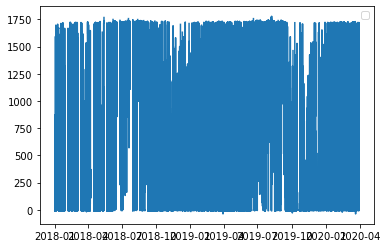

No handles with labels found to put in legend.


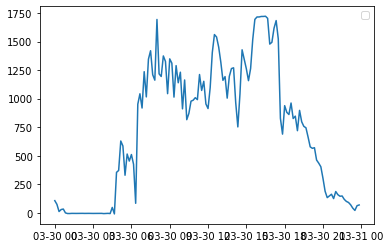

No handles with labels found to put in legend.


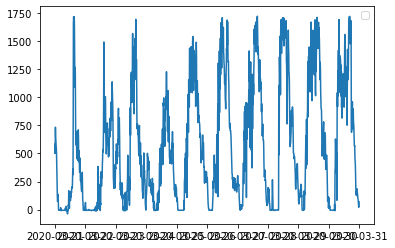

In [47]:
from matplotlib import pylab as plt
#Plot ActivePower 
plt.plot(df["ActivePower"])
plt.legend()
plt.show()

#Plot ActivePower. Last 24 hours -   6 * 24
plt.plot(df["ActivePower"][-144:])
plt.legend()
plt.show()

#Plot ActivePower. Last 10 days -  6(m) * 24(h) * 10(d)
plt.plot(df["ActivePower"][-1440:])
plt.legend()
plt.show()

No handles with labels found to put in legend.


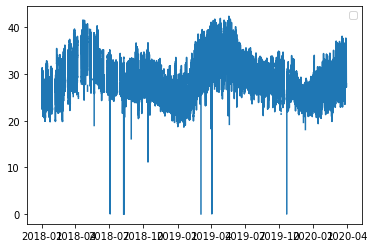

No handles with labels found to put in legend.


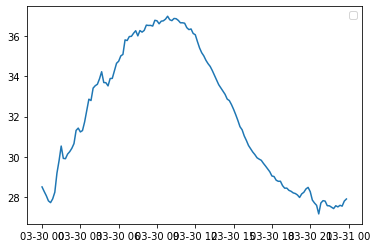

No handles with labels found to put in legend.


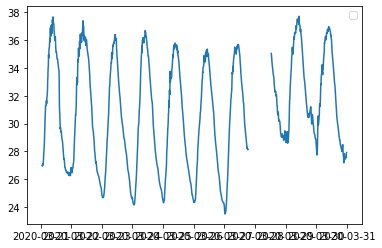

In [48]:
#Plot AmbientTemperatue
plt.plot(df["AmbientTemperatue"])
plt.legend()
plt.show()

#Plot AmbientTemperatue. Last 24 hours -   6 * 24
plt.plot(df["AmbientTemperatue"][-144:])
plt.legend()
plt.show()

#Plot AmbientTemperatue. Last 10 days -  6(m) * 24(h) * 10(d)
plt.plot(df["AmbientTemperatue"][-1440:])
plt.legend()
plt.show()

No handles with labels found to put in legend.


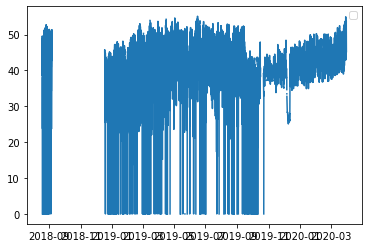

No handles with labels found to put in legend.


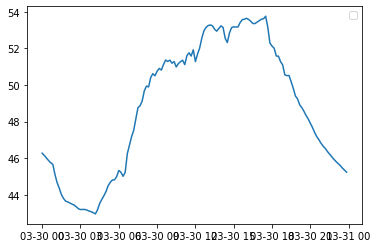

No handles with labels found to put in legend.


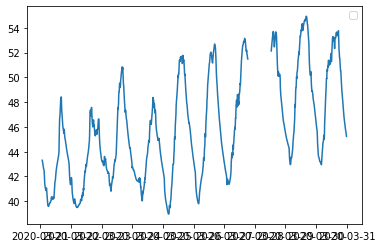

In [49]:
#Plot BearingShaftTemperature.
plt.plot(df["BearingShaftTemperature"])
plt.legend()
plt.show()

#Plot BearingShaftTemperature. Last 24 hours -   6 * 24
plt.plot(df["BearingShaftTemperature"][-144:])
plt.legend()
plt.show()

#Plot BearingShaftTemperature. Last 10 days -  6(m) * 24(h) * 10(d)
plt.plot(df["BearingShaftTemperature"][-1440:])
plt.legend()
plt.show()

No handles with labels found to put in legend.


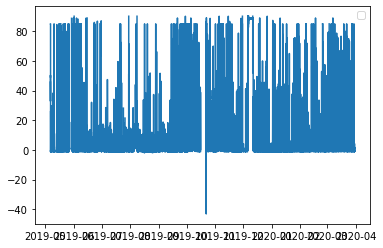

No handles with labels found to put in legend.


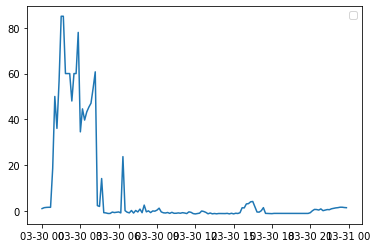

No handles with labels found to put in legend.


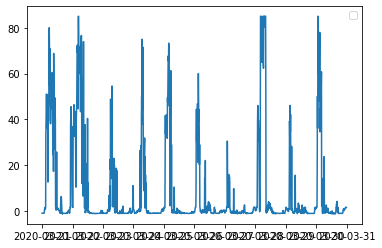

In [53]:
#Plot Blade1PitchAngle.
plt.plot(df["Blade1PitchAngle"])
plt.legend()
plt.show()

#Plot Blade1PitchAngle. Last 24 hours -   6 * 24
plt.plot(df["Blade1PitchAngle"][-144:])
plt.legend()
plt.show()

#Plot Blade1PitchAngle. Last 10 days -  6(m) * 24(h) * 10(d)
plt.plot(df["Blade1PitchAngle"][-1440:])
plt.legend()
plt.show()

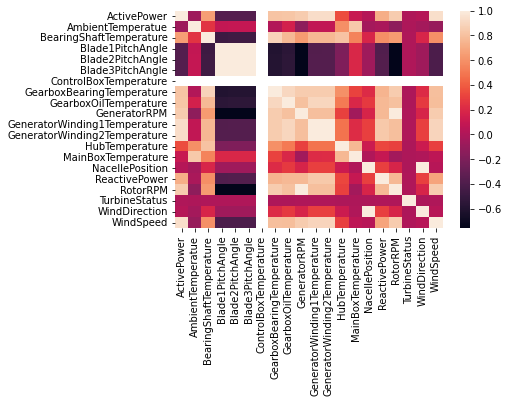

In [35]:
import seaborn as sns
sns.heatmap(df.corr()) #plot pairwise correlation of columns

# Processing

In [61]:
#Dataset information
df.info()
print('-'*90)

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118224 entries, 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   94750 non-null  float64
 1   AmbientTemperatue             93817 non-null  float64
 2   BearingShaftTemperature       62518 non-null  float64
 3   Blade1PitchAngle              41996 non-null  float64
 4   Blade2PitchAngle              41891 non-null  float64
 5   Blade3PitchAngle              41891 non-null  float64
 6   GearboxBearingTemperature     62540 non-null  float64
 7   GearboxOilTemperature         62438 non-null  float64
 8   GeneratorRPM                  62295 non-null  float64
 9   GeneratorWinding1Temperature  62427 non-null  float64
 10  GeneratorWinding2Temperature  62449 non-null  float64
 11  HubTemperature                62406 non-null  float64
 12  MainBoxTempe

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [62]:
target = ['ActivePower']

columns = ['AmbientTemperatue' ,'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle' ,
           'Blade3PitchAngle','GearboxBearingTemperature', 'GearboxOilTemperature','GeneratorRPM',
           'GeneratorWinding1Temperature','GeneratorWinding2Temperature','HubTemperature','MainBoxTemperature',
           'NacellePosition','ReactivePower','RotorRPM','TurbineStatus', 'WindDirection','WindSpeed']

In [63]:
df_median = df.copy()
df_mean = df.copy()
df_mode = df.copy()

for n in columns: 
    df_median[n].fillna(df_median[n].median(),inplace = True)
    df_mean[n].fillna(df_mean[n].mean(),inplace = True)
    df_mode[n].fillna(df_mode[n].mode(),inplace = True)

In [64]:
df_median.describe(datetime_is_numeric = True)

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,1.182240e+05,118224.000000,118224.000000
mean,619.109805,28.685033,42.963394,3.717605,4.130284,4.130284,64.517005,57.388925,1112.828712,69.311673,68.608353,36.947947,39.521073,190.736734,77.758507,9.998225,1.214372e+03,190.736734,5.814764
std,611.275373,3.896064,4.032802,13.093631,12.834936,12.834936,7.610422,4.599345,383.486996,16.776437,16.810500,3.762904,4.168552,69.389261,106.441060,3.421776,2.615875e+05,69.389261,2.346292
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,26.350811,42.512424,0.394399,0.888977,0.888977,64.181922,56.876925,1095.351163,64.597785,63.796541,36.996185,39.157395,172.000000,-0.068410,9.850361,2.000000e+00,172.000000,4.285497
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,30.714347,43.291577,0.394399,0.888977,0.888977,65.446392,57.500770,1155.511885,67.010176,66.257863,37.312651,39.832760,195.500000,108.893640,10.362055,2.000000e+00,195.500000,6.930121
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [65]:
df_all = [df_median, df_mean, df_mode]

for df in df_all:
    df.dropna(axis=0,how = 'any',inplace = True)
    print(df.isnull().sum())

ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WindDirection                   0
WindSpeed                       0
dtype: int64
ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
G

# df_mean

In [73]:
df_processed = df_mean

In [74]:
mask = (df_processed.index < pd.to_datetime("2020-03-01 00:00:00").tz_localize('US/Eastern'))
training_data = df_processed.loc[mask]

val_mask = (df_processed.index >= pd.to_datetime("2020-03-01").tz_localize('US/Eastern')) & (df_processed.index <= pd.to_datetime("2020-03-15").tz_localize('US/Eastern'))
val_data = df_processed.loc[val_mask]

test_mask = (df_processed.index > pd.to_datetime("2020-03-15").tz_localize('US/Eastern'))
test_data = df_processed.loc[test_mask]

In [75]:
column_training = ['ActivePower','AmbientTemperatue' ,'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle' ,
           'Blade3PitchAngle','GearboxBearingTemperature', 'GearboxOilTemperature','GeneratorRPM',
           'GeneratorWinding1Temperature','GeneratorWinding2Temperature','HubTemperature','MainBoxTemperature',
           'NacellePosition','ReactivePower','RotorRPM','TurbineStatus', 'WindDirection','WindSpeed']

x_train = training_data[column_training]

x_val = val_data[column_training]

x_test = test_data[column_training]

In [76]:
scaler = MinMaxScaler().fit(x_train)

xtrain_norm = scaler.transform(x_train)
xval_norm = scaler.transform(x_val)
xtest_norm = scaler.transform(x_test)

y_train_final = xtrain_norm[:,:1]
x_train_final = xtrain_norm[:,1:]


y_val_final = xval_norm[:,:1]
x_val_final = xval_norm[:,1:]

y_test_final = xtest_norm[:,:1]
x_test_final = xtest_norm[:,1:]

In [101]:
batch_size = 128
window_length = 24

#input_data = x_train_final[:-window_length]
targets = y_train_final[window_length:]
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train_final, targets, sequence_length = window_length, batch_size=batch_size)




#input_data = x_val_final[:-window_length]
targets = y_val_final[window_length:]
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val_final, targets, sequence_length=window_length, batch_size=batch_size)

#input_data = x_test_final[:-1]
targets = y_test_final[window_length:]
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test_final, targets, sequence_length=window_length, batch_size=batch_size)


In [102]:
model_k = Sequential()
model_k.add(GRU(32, input_shape=(window_length,18)))

model_k.add(Dense(1, activation='linear'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model_k.compile(loss='mae', optimizer=opt)
model_k.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 32)                4992      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [103]:
history = model_k.fit(dataset_train, validation_data=dataset_val,epochs=40)

Epoch 1/40
707/707 [==============================] - 25s 33ms/step - loss: 0.2230 - val_loss: 0.1224
Epoch 2/40
707/707 [==============================] - 23s 32ms/step - loss: 0.1422 - val_loss: 0.0927
Epoch 3/40
707/707 [==============================] - 23s 33ms/step - loss: 0.1118 - val_loss: 0.0773
Epoch 4/40
707/707 [==============================] - 24s 34ms/step - loss: 0.0993 - val_loss: 0.0710
Epoch 5/40
707/707 [==============================] - 24s 33ms/step - loss: 0.0962 - val_loss: 0.0696
Epoch 6/40
707/707 [==============================] - 23s 33ms/step - loss: 0.0963 - val_loss: 0.0692
Epoch 7/40
707/707 [==============================] - 22s 31ms/step - loss: 0.0962 - val_loss: 0.0690
Epoch 8/40
707/707 [==============================] - 23s 32ms/step - loss: 0.0956 - val_loss: 0.0688
Epoch 9/40
707/707 [==============================] - 23s 33ms/step - loss: 0.0950 - val_loss: 0.0686
Epoch 10/40
707/707 [==============================] - 23s 33ms/step - loss: 0.094

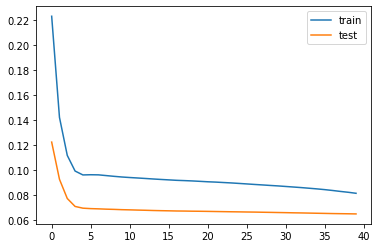

In [104]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [105]:
res = model_k.evaluate(dataset_test)
print(res)

18/18 [==============================] - 1s 25ms/step - loss: 0.0923
0.09227169305086136


Test RMSE: 301.926
Test MSE: 91159.153
Test MAE: 167.689


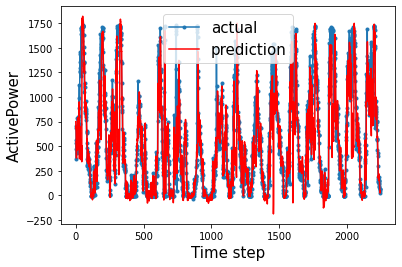

In [106]:
yhat = model_k.predict(dataset_test)


inv_yhat = np.concatenate((yhat, x_test_final[window_length:][:, -18:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]


# invert scaling for actual
inv_y = np.concatenate((y_test_final[window_length:], x_test_final[window_length:][:, -18:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

mse = mean_squared_error(inv_y, inv_yhat)
print('Test MSE: %.3f' % mse)

mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)


aa=[x for x in range(inv_y.shape[0])]
plt.plot(aa, inv_y[:inv_y.shape[0]], marker='.', label="actual")
plt.plot(aa, inv_yhat[:inv_y.shape[0]], 'r', label="prediction")
plt.ylabel('ActivePower', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

#LSMT

In [116]:
LSTM model
model = Sequential()
model.add(LSTM(16,input_shape=(window_length,18), activation='relu', return_sequences=False) )

model.add(Dense(1, activation='linear'))


optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile( loss='mae', metrics='mae', optimizer=optimizer)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 16)                2240      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [117]:
history = model.fit(dataset_train, validation_data=dataset_val,epochs=40)

Epoch 1/40
707/707 [==============================] - 22s 29ms/step - loss: 0.1061 - mae: 0.1061 - val_loss: 0.0749 - val_mae: 0.0749
Epoch 2/40
707/707 [==============================] - 20s 28ms/step - loss: 0.0860 - mae: 0.0860 - val_loss: 0.0715 - val_mae: 0.0715
Epoch 3/40
707/707 [==============================] - 21s 29ms/step - loss: 0.0821 - mae: 0.0821 - val_loss: 0.0693 - val_mae: 0.0693
Epoch 4/40
707/707 [==============================] - 21s 29ms/step - loss: 0.0803 - mae: 0.0803 - val_loss: 0.0672 - val_mae: 0.0672
Epoch 5/40
707/707 [==============================] - 22s 31ms/step - loss: 0.0798 - mae: 0.0798 - val_loss: 0.0661 - val_mae: 0.0661
Epoch 6/40
707/707 [==============================] - 21s 30ms/step - loss: 0.0791 - mae: 0.0791 - val_loss: 0.0651 - val_mae: 0.0651
Epoch 7/40
707/707 [==============================] - 21s 30ms/step - loss: 0.0788 - mae: 0.0788 - val_loss: 0.0638 - val_mae: 0.0638
Epoch 8/40
707/707 [==============================] - 22s 32ms

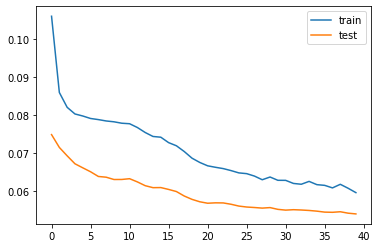

In [118]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [119]:
res = model.evaluate(dataset_test)
print(res)

18/18 [==============================] - 0s 23ms/step - loss: 0.0720 - mae: 0.0720
[0.07199694216251373, 0.07199694216251373]


Test RMSE: 220.028
Test MSE: 48412.179
Test MAE: 130.843


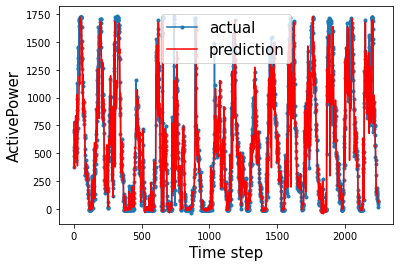

In [120]:
yhat = model.predict(dataset_test)


inv_yhat = np.concatenate((yhat, x_test_final[window_length:][:, -18:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]


# invert scaling for actual
inv_y = np.concatenate((y_test_final[window_length:], x_test_final[window_length:][:, -18:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

mse = mean_squared_error(inv_y, inv_yhat)
print('Test MSE: %.3f' % mse)

mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)


aa=[x for x in range(inv_y.shape[0])]
plt.plot(aa, inv_y[:inv_y.shape[0]], marker='.', label="actual")
plt.plot(aa, inv_yhat[:inv_y.shape[0]], 'r', label="prediction")
plt.ylabel('ActivePower', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()